In [1]:
import hylite
from hylite import io
import numpy as np
from hylite.analyse import band_ratio # import the band ratio function
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# load datasets to play with
image = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/hymap_final_sub.hdr')

In [5]:
from hylite.analyse import minimum_wavelength, colourise_mwl # import minimum wavelength mapping functions

In [5]:
#SWIR
# calculate minimum wavelength map. Note that this can take a while.
mwl = minimum_wavelength( image, # data to map
                          2100., # start of mapping range 
                          2300., # end of mapping range
                          trend='hull', # apply hull correction to detrend data before fitting
                          method='gauss', # fitting method. Change to 'minmax' for fast but (very) approximate result.
                          n=2, # number of gaussian features to fit
                          sym=False, # force features to be symmetric?
                          minima=True, # look for minima, not maxima (maxima can be useful in the LWIR though)
                          nthreads=-1 ) # use ncores - 1 threads

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Fitting gaussians:   1%|          | 184/16049 [00:01<01:42, 154.48it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Fitting gaussians:   1%|          | 200/16049 [00:01<02:19, 113.28it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


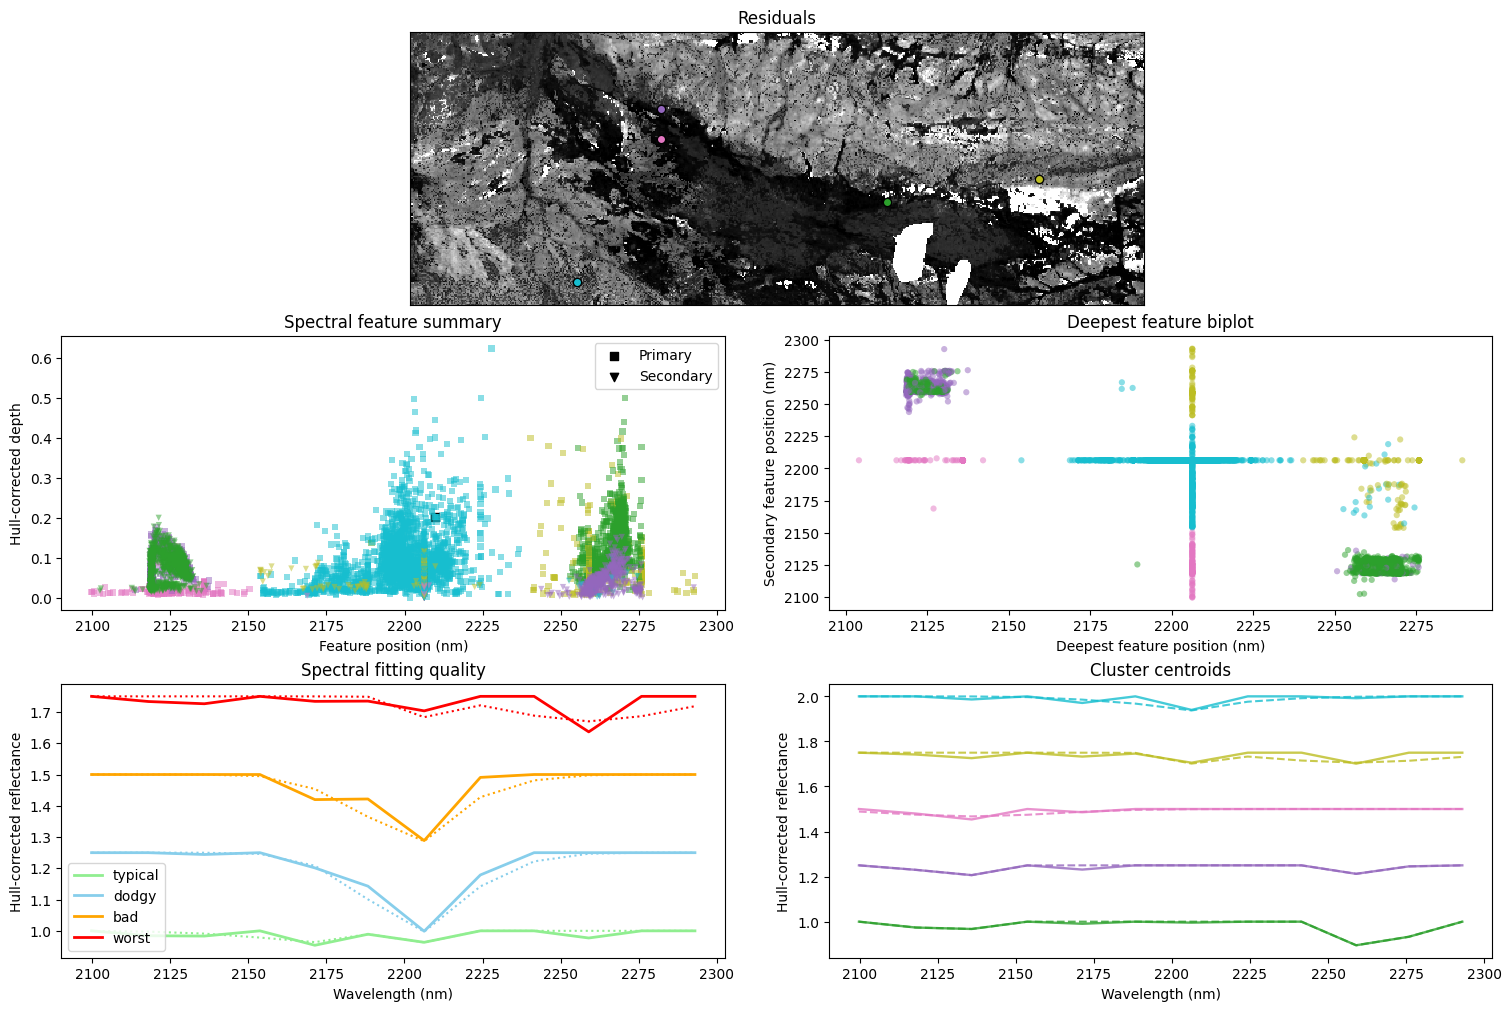

In [6]:
fig,ax = mwl.quick_plot(cam=image.header.get_camera(0))

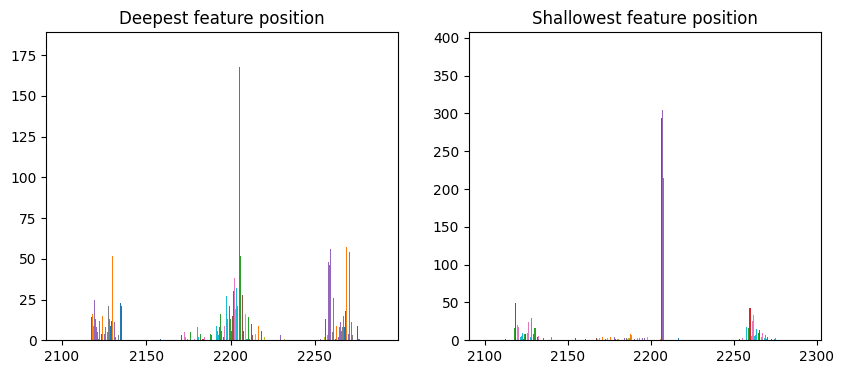

In [7]:
mwl.sortByDepth()
d = mwl[0, 'pos'] # this will be a numpy slice containing the position of the deepest feature
s = mwl[-1, 'pos'] # this will be a numpy slice containing the position of the shallowest feature
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(d,bins=100)
ax[0].set_title("Deepest feature position")
ax[1].hist(s,bins=100)
ax[1].set_title("Shallowest feature position")
fig.show()

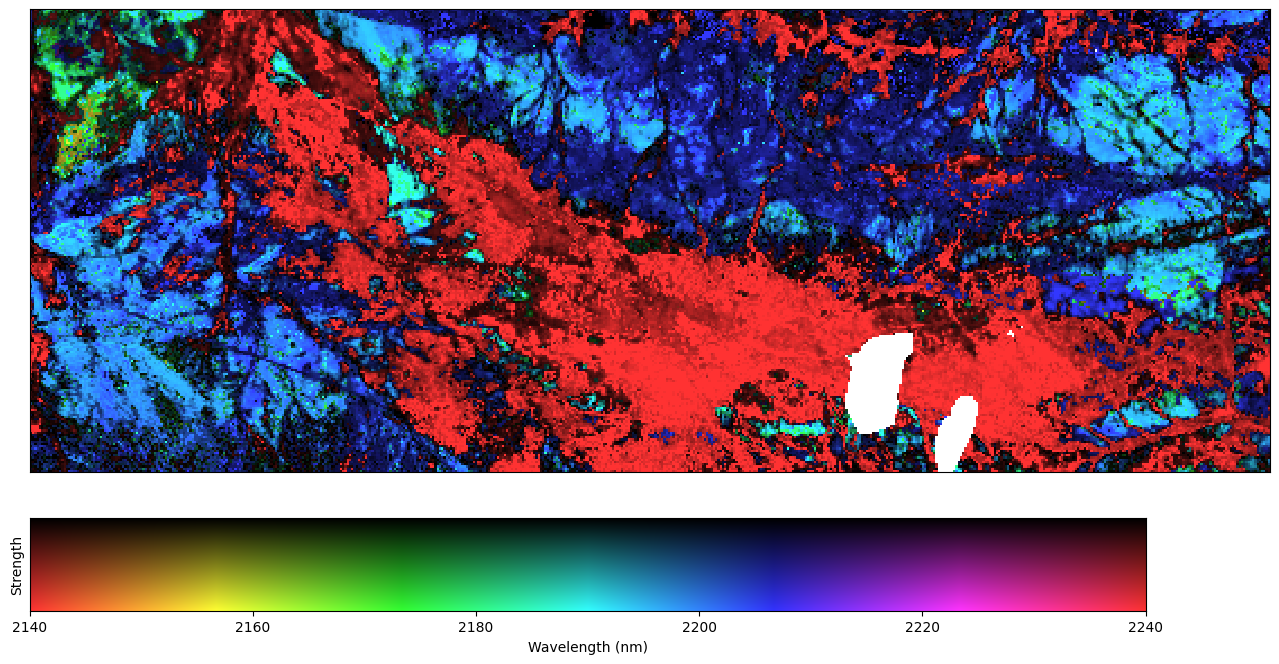

In [30]:
rgb, leg = colourise_mwl( mwl.closest(2160., valid_range=None, depth_cutoff=0.05),
                          val_map=(0.01,0.1),  # this controls the depth -> brightne
                         hue_map=(2140., 2240.)) # this controls the wavelength
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()

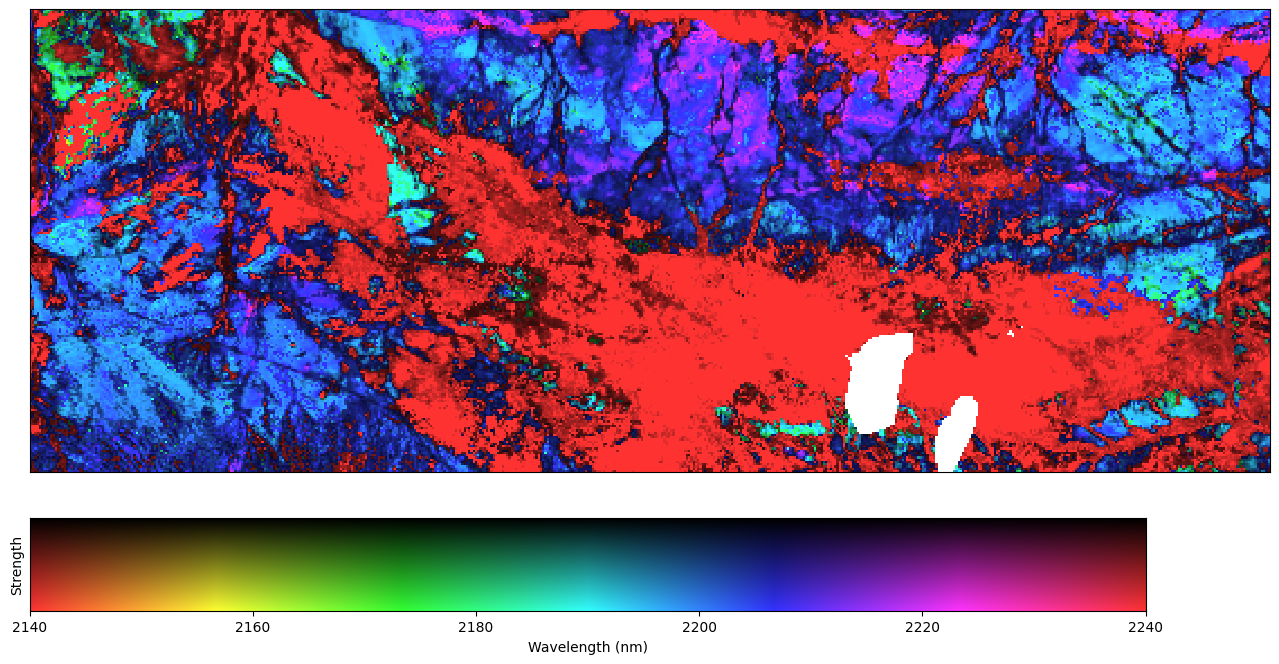

In [29]:
Carbonates = mwl.deepest(2100., 2300.) # get deepest feature in this range
rgb, leg = colourise_mwl( Carbonates, hue_map=(2140., 2240.), val_map=(0., 0.1), )
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()

In [6]:
# calculate minimum wavelength map. Note that this can take a while.
mwl_s = minimum_wavelength( image, # data to map
                          2100., # start of mapping range 
                          2400., # end of mapping range
                          trend='hull', # apply hull correction to detrend data before fitting
                          method='gauss', # fitting method. Change to 'minmax' for fast but (very) approximate result.
                          n=2, # number of gaussian features to fit
                          sym=False, # force features to be symmetric?
                          minima=True, # look for minima, not maxima (maxima can be useful in the LWIR though)
                          nthreads=-1 ) # use ncores - 1 threads

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Fitting gaussians:   1%|          | 85/16049 [00:00<02:15, 117.86it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Fitting gaussians:   1%|          | 103/16049 [00:00<02:02, 129.97it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


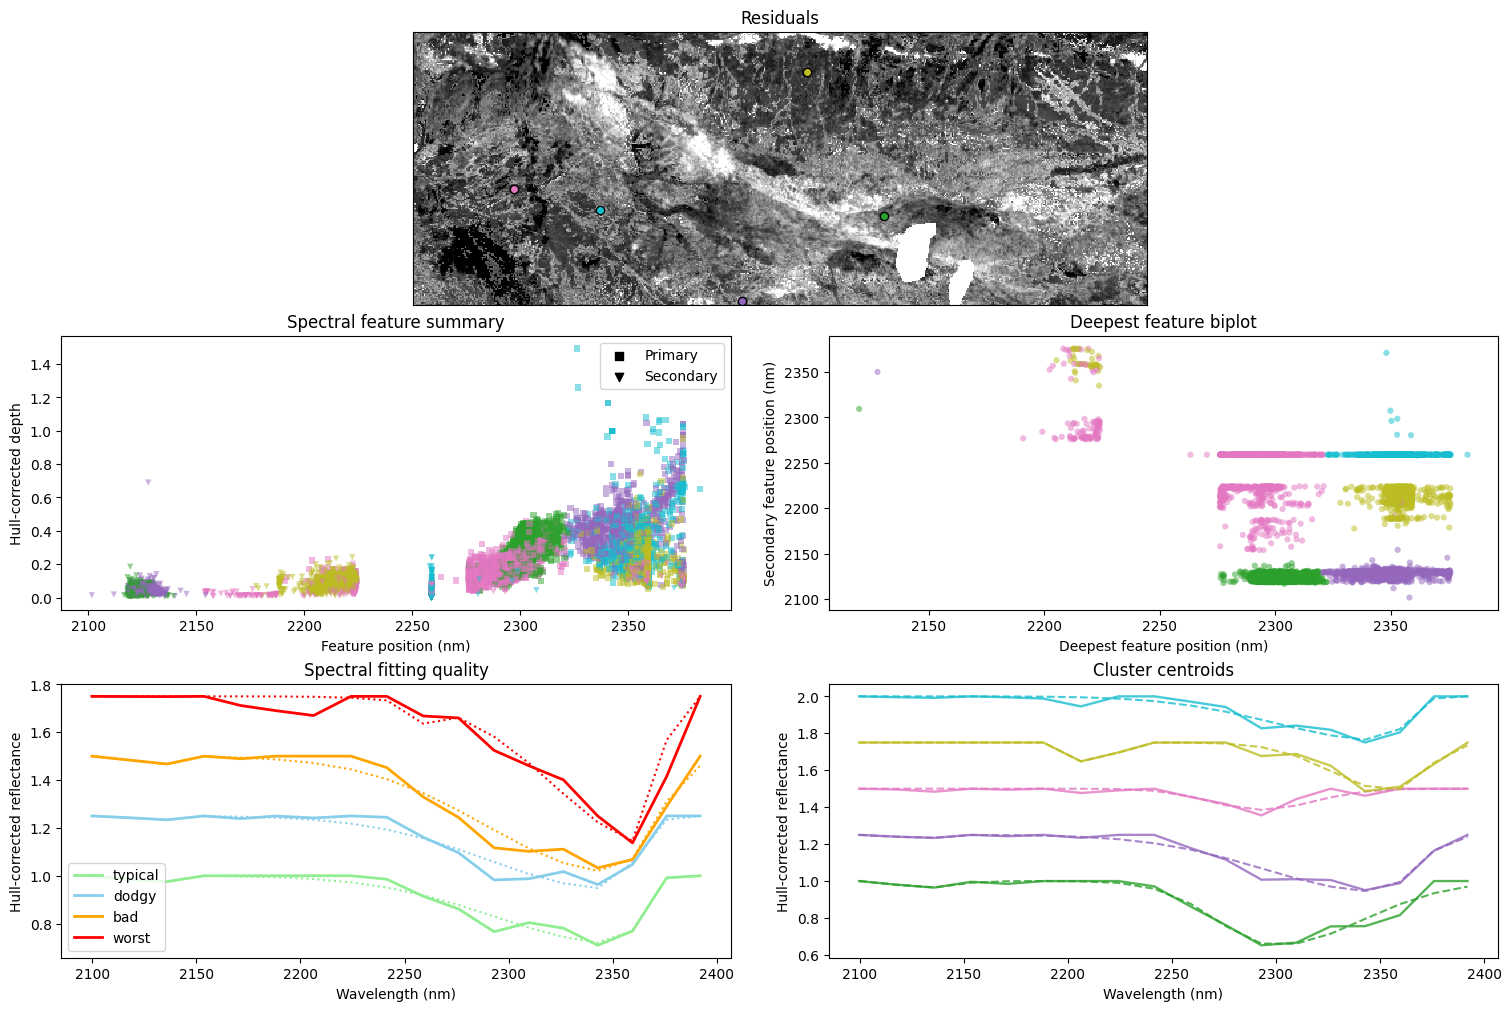

In [7]:
fig,ax = mwl_s.quick_plot(cam=image.header.get_camera(0))

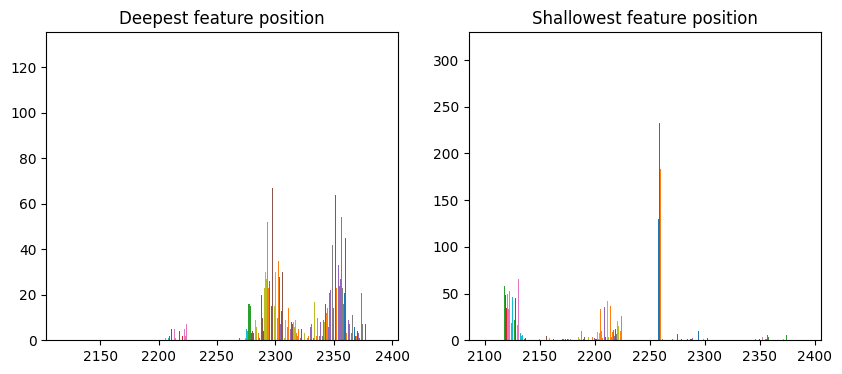

In [8]:
mwl_s.sortByDepth()
d = mwl_s[0, 'pos'] # this will be a numpy slice containing the position of the deepest feature
s = mwl_s[-1, 'pos'] # this will be a numpy slice containing the position of the shallowest feature
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(d,bins=100)
ax[0].set_title("Deepest feature position")
ax[1].hist(s,bins=100)
ax[1].set_title("Shallowest feature position")
fig.show()

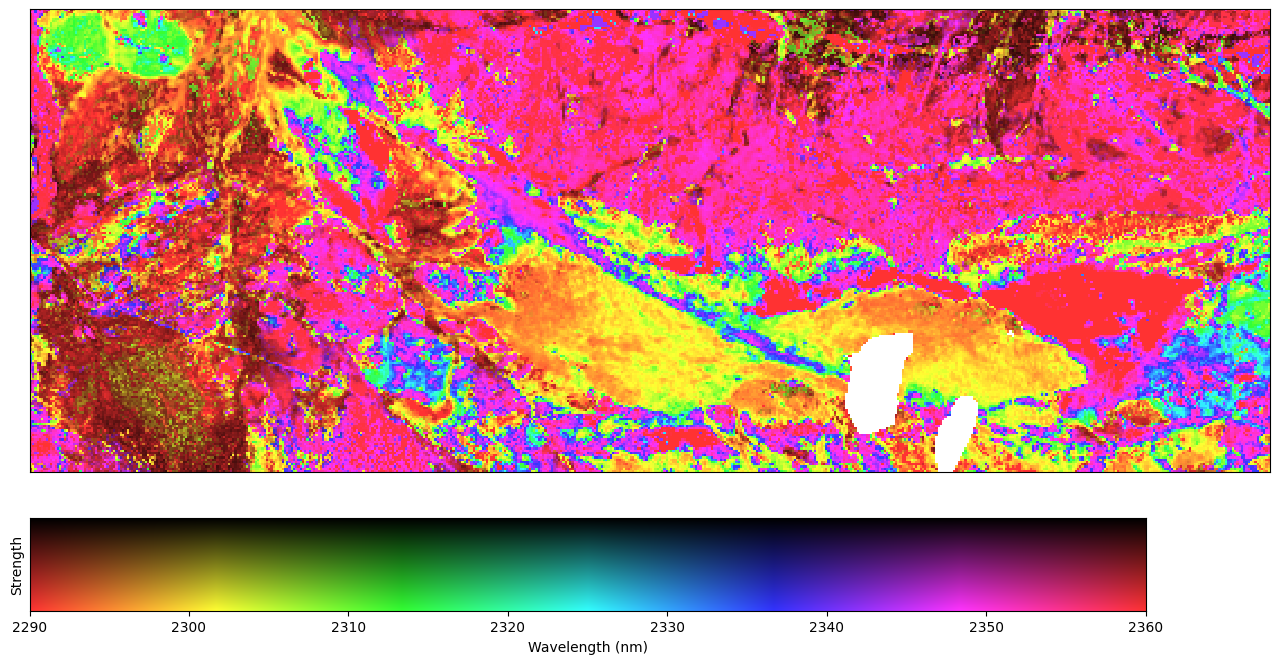

In [14]:
rgb, leg = colourise_mwl( mwl_s.deepest(wmin=2100., wmax=2400), val_map=(0.,0.2), hue_map=(2290., 2360.)) 
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()